INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

REGRESIÓN LINEAL SIMPLE (ENTIRE HOME / APT)

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
07/10/2024

# Librería y carga de Archivo

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [3]:
# Antes de dividir el dataframe, observamos los valores numéricos de la columna catégorica "room_type"
df[["room_type","room_type_num"]].value_counts()

room_type        room_type_num
Entire home/apt  0                1759
Private room     1                1096
Shared room      2                   7
Name: count, dtype: int64

In [4]:
# Fragmentamos el dataframe solo con las variables a analizar

df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","number_of_reviews_ltm"]]

In [5]:
df1["review_scores_location"]

0       5
1       5
2       5
3       5
4       5
       ..
2857    5
2858    5
2859    5
2860    5
2861    5
Name: review_scores_location, Length: 2862, dtype: int64

In [6]:
# Corroboramos
df1["room_type_num"].value_counts()

room_type_num
0    1759
1    1096
2       7
Name: count, dtype: int64

# Dividir el dataframe según el tipo de habitación

## Entire home/apt | 0

In [7]:
dfHome = df1[df1["room_type_num"] == 0]
dfHome

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,94.0,100.0,5,5,175,99,99,0.65,5,14
1,0,100.0,100.0,5,5,200,265,6,0.04,5,1
3,0,82.0,100.0,5,5,66,344,76,0.57,5,25
4,0,89.0,100.0,5,5,91,175,9,0.09,5,2
5,0,89.0,100.0,5,5,129,107,9,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...
2853,0,100.0,100.0,5,5,241,165,0,1.16,5,0
2854,0,96.0,97.0,5,5,259,267,1,1.00,5,1
2859,0,98.0,100.0,5,5,513,365,0,1.16,5,0
2860,0,87.5,94.8,5,5,80,329,0,1.16,5,0


### Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

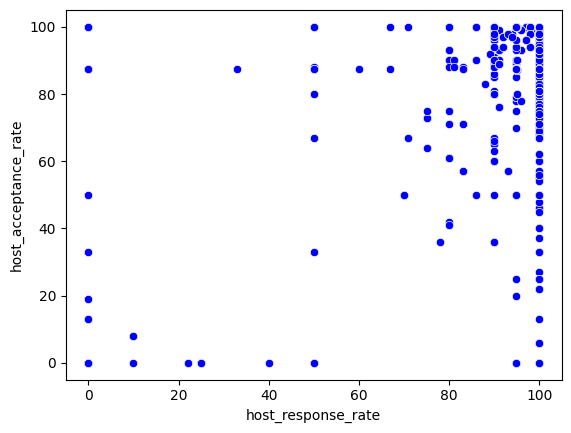

In [8]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [9]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome[["host_acceptance_rate"]] # Dependiente = y

In [10]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [12]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.4611466]]),
 'rank_': 1,
 'singular_': array([656.56734943]),
 'intercept_': array([45.28541353])}

**Modelo Matemático: y = 0.4611466x + 45.28541353**

In [13]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome[['host_response_rate']])
y_pred

array([[91.4000731],
       [91.4000731],
       [91.4000731],
       ...,
       [91.4000731],
       [89.0021108],
       [89.0021108]])

In [14]:
# Insertamos la columna de preddiciones en el df
dfHome.insert(2, 'Predict1', y_pred)
dfHome

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,94.0,91.400073,100.0,5,5,175,99,99,0.65,5,14
1,0,100.0,91.400073,100.0,5,5,200,265,6,0.04,5,1
3,0,82.0,91.400073,100.0,5,5,66,344,76,0.57,5,25
4,0,89.0,91.400073,100.0,5,5,91,175,9,0.09,5,2
5,0,89.0,91.400073,100.0,5,5,129,107,9,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,100.0,91.400073,100.0,5,5,241,165,0,1.16,5,0
2854,0,96.0,90.016633,97.0,5,5,259,267,1,1.00,5,1
2859,0,98.0,91.400073,100.0,5,5,513,365,0,1.16,5,0
2860,0,87.5,89.002111,94.8,5,5,80,329,0,1.16,5,0


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

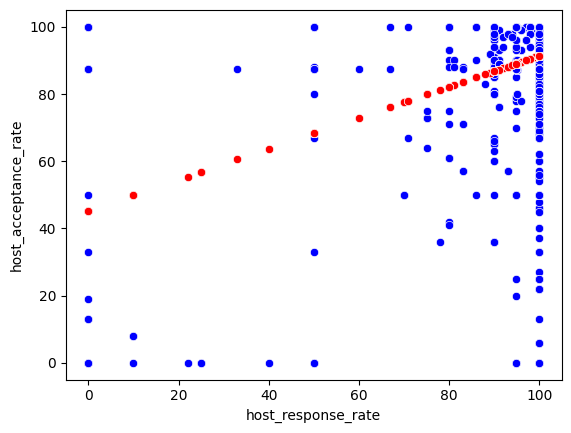

In [15]:
# Gráfica de comparación
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome)

In [16]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.14490285210893816

In [17]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.38066107248960745

### Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

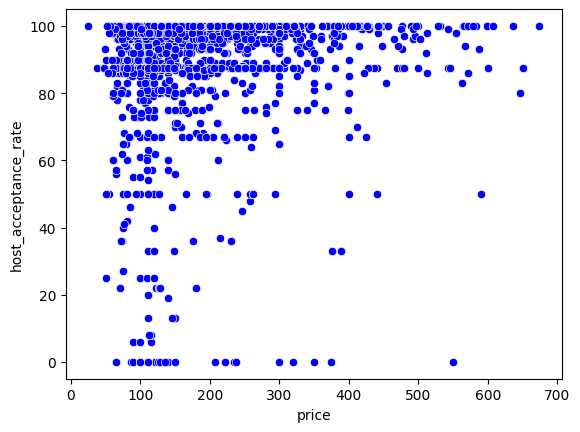

In [18]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [19]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["price"]]
Var_Dep = dfHome[["host_acceptance_rate"]]

In [20]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.01275674]]),
 'rank_': 1,
 'singular_': array([4371.22827292]),
 'intercept_': array([87.00656758])}

**Modelo Matemático: y = 0.01275674x + 87.00656758**

In [21]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(8, 'Predict2', y_pred)
dfHome

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,94.0,91.400073,100.0,5,5,175,99,89.238997,99,0.65,5,14
1,0,100.0,91.400073,100.0,5,5,200,265,89.557916,6,0.04,5,1
3,0,82.0,91.400073,100.0,5,5,66,344,87.848513,76,0.57,5,25
4,0,89.0,91.400073,100.0,5,5,91,175,88.167431,9,0.09,5,2
5,0,89.0,91.400073,100.0,5,5,129,107,88.652187,9,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,100.0,91.400073,100.0,5,5,241,165,90.080942,0,1.16,5,0
2854,0,96.0,90.016633,97.0,5,5,259,267,90.310564,1,1.00,5,1
2859,0,98.0,91.400073,100.0,5,5,513,365,93.550776,0,1.16,5,0
2860,0,87.5,89.002111,94.8,5,5,80,329,88.027107,0,1.16,5,0


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

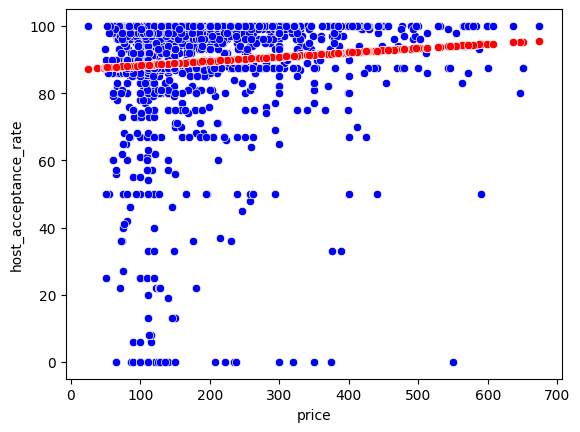

In [22]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome)

In [23]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.0701073318338341

### Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

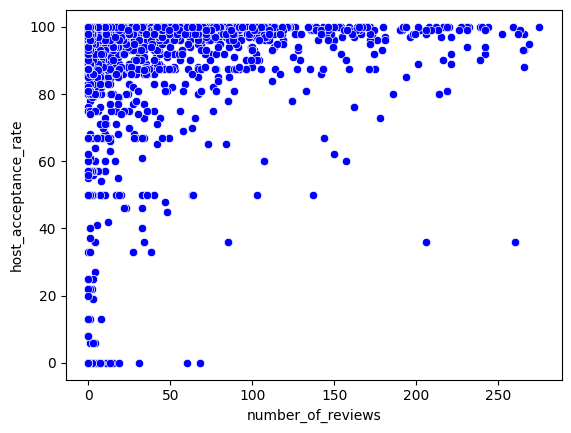

In [24]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [25]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews"]]
Var_Dep = dfHome[["host_acceptance_rate"]]

In [26]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.06053405]]),
 'rank_': 1,
 'singular_': array([2226.02973674]),
 'intercept_': array([86.92267375])}

**Modelo Matemático y = 0.06053405x + 86.92267375**

In [27]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(1, 'Predict3', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,92.915545,94.0,91.400073,100.0,5,5,175,99,89.238997,99,0.65,5,14
1,0,87.285878,100.0,91.400073,100.0,5,5,200,265,89.557916,6,0.04,5,1
3,0,91.523262,82.0,91.400073,100.0,5,5,66,344,87.848513,76,0.57,5,25
4,0,87.467480,89.0,91.400073,100.0,5,5,91,175,88.167431,9,0.09,5,2
5,0,87.467480,89.0,91.400073,100.0,5,5,129,107,88.652187,9,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,86.922674,100.0,91.400073,100.0,5,5,241,165,90.080942,0,1.16,5,0
2854,0,86.983208,96.0,90.016633,97.0,5,5,259,267,90.310564,1,1.00,5,1
2859,0,86.922674,98.0,91.400073,100.0,5,5,513,365,93.550776,0,1.16,5,0
2860,0,86.922674,87.5,89.002111,94.8,5,5,80,329,88.027107,0,1.16,5,0


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

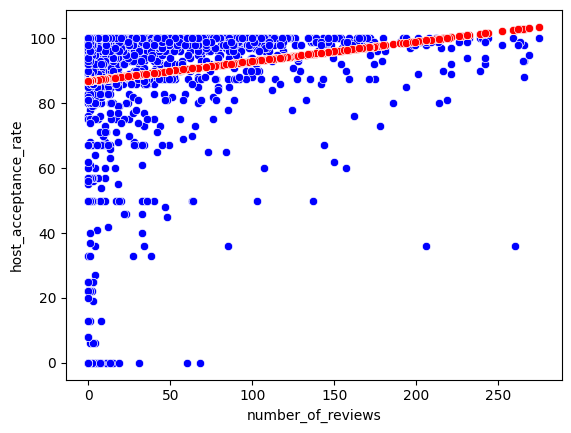

In [28]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome)

In [29]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.16941462659372422

### Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

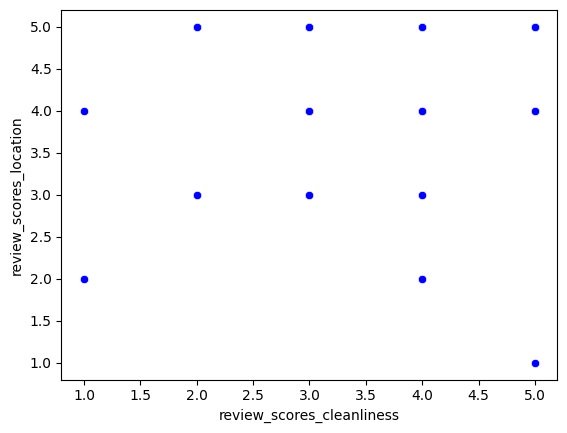

In [30]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [31]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_cleanliness"]]
Var_Dep = dfHome[["review_scores_location"]]

In [32]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.31625469]]),
 'rank_': 1,
 'singular_': array([16.54490676]),
 'intercept_': array([3.3785104])}

**Modelo Matemático: y = 0.31625469x + 3.3785104**

In [33]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(6, 'Predict4', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,92.915545,94.0,91.400073,100.0,5,4.959784,5,175,99,89.238997,99,0.65,5,14
1,0,87.285878,100.0,91.400073,100.0,5,4.959784,5,200,265,89.557916,6,0.04,5,1
3,0,91.523262,82.0,91.400073,100.0,5,4.959784,5,66,344,87.848513,76,0.57,5,25
4,0,87.467480,89.0,91.400073,100.0,5,4.959784,5,91,175,88.167431,9,0.09,5,2
5,0,87.467480,89.0,91.400073,100.0,5,4.959784,5,129,107,88.652187,9,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,86.922674,100.0,91.400073,100.0,5,4.959784,5,241,165,90.080942,0,1.16,5,0
2854,0,86.983208,96.0,90.016633,97.0,5,4.959784,5,259,267,90.310564,1,1.00,5,1
2859,0,86.922674,98.0,91.400073,100.0,5,4.959784,5,513,365,93.550776,0,1.16,5,0
2860,0,86.922674,87.5,89.002111,94.8,5,4.959784,5,80,329,88.027107,0,1.16,5,0


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

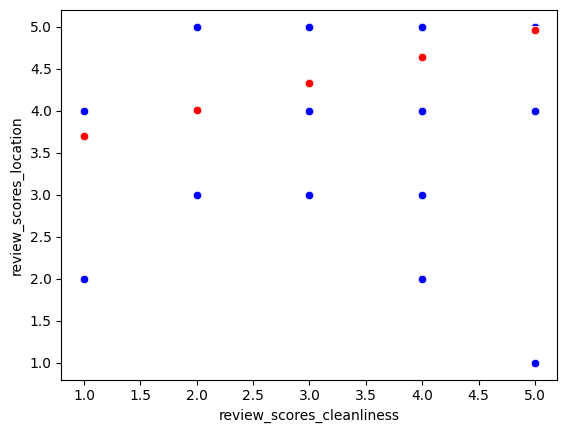

In [34]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome)

In [35]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.4075183773499661

### Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

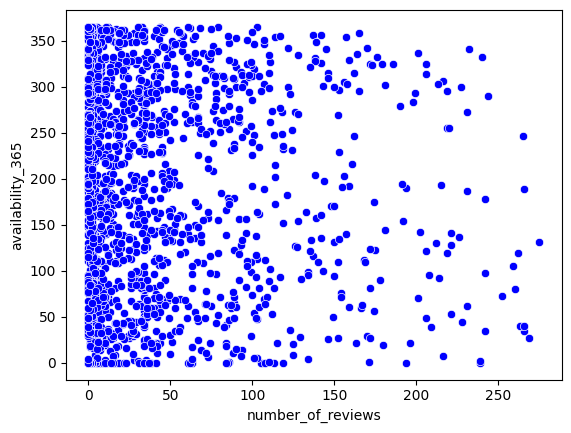

In [36]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [37]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews"]]
Var_Dep = dfHome[["availability_365"]]

In [38]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.11364586]]),
 'rank_': 1,
 'singular_': array([2226.02973674]),
 'intercept_': array([195.0580972])}

**Modelo Matemático: y = -0.11364586x + 195.0580972**

In [39]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(7, 'Predict5', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,92.915545,94.0,91.400073,100.0,5,4.959784,183.807157,5,175,99,89.238997,99,0.65,5,14
1,0,87.285878,100.0,91.400073,100.0,5,4.959784,194.376222,5,200,265,89.557916,6,0.04,5,1
3,0,91.523262,82.0,91.400073,100.0,5,4.959784,186.421011,5,66,344,87.848513,76,0.57,5,25
4,0,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,91,175,88.167431,9,0.09,5,2
5,0,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,129,107,88.652187,9,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,86.922674,100.0,91.400073,100.0,5,4.959784,195.058097,5,241,165,90.080942,0,1.16,5,0
2854,0,86.983208,96.0,90.016633,97.0,5,4.959784,194.944451,5,259,267,90.310564,1,1.00,5,1
2859,0,86.922674,98.0,91.400073,100.0,5,4.959784,195.058097,5,513,365,93.550776,0,1.16,5,0
2860,0,86.922674,87.5,89.002111,94.8,5,4.959784,195.058097,5,80,329,88.027107,0,1.16,5,0


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

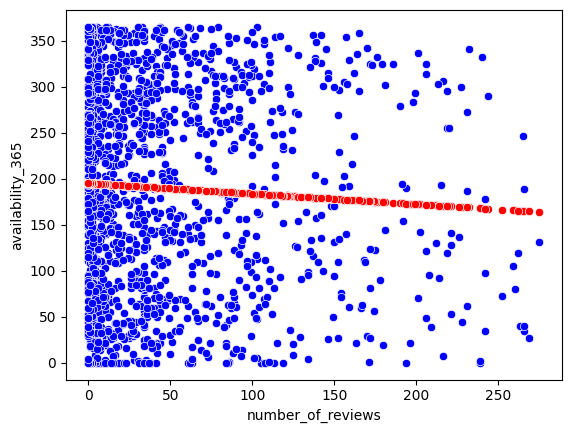

In [40]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome)

In [41]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.05353904777690467

### Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

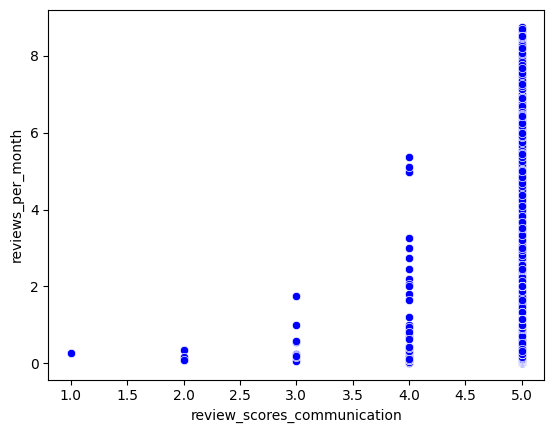

In [42]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [43]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_communication"]]
Var_Dep = dfHome[["reviews_per_month"]]

In [44]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.73464358]]),
 'rank_': 1,
 'singular_': array([12.16893593]),
 'intercept_': array([-1.71858921])}

**Modelo Matemático: y = 0.73464358x - 1.71858921**

In [45]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(13, 'Predict6', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,92.915545,94.0,91.400073,100.0,5,4.959784,183.807157,5,175,99,89.238997,99,1.954629,0.65,5,14
1,0,87.285878,100.0,91.400073,100.0,5,4.959784,194.376222,5,200,265,89.557916,6,1.954629,0.04,5,1
3,0,91.523262,82.0,91.400073,100.0,5,4.959784,186.421011,5,66,344,87.848513,76,1.954629,0.57,5,25
4,0,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,91,175,88.167431,9,1.954629,0.09,5,2
5,0,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,129,107,88.652187,9,1.954629,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,86.922674,100.0,91.400073,100.0,5,4.959784,195.058097,5,241,165,90.080942,0,1.954629,1.16,5,0
2854,0,86.983208,96.0,90.016633,97.0,5,4.959784,194.944451,5,259,267,90.310564,1,1.954629,1.00,5,1
2859,0,86.922674,98.0,91.400073,100.0,5,4.959784,195.058097,5,513,365,93.550776,0,1.954629,1.16,5,0
2860,0,86.922674,87.5,89.002111,94.8,5,4.959784,195.058097,5,80,329,88.027107,0,1.954629,1.16,5,0


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

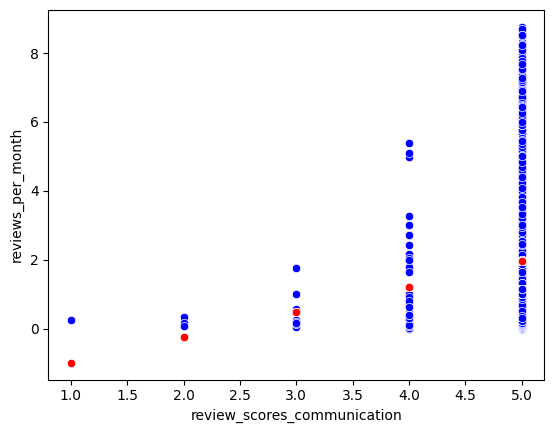

In [46]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome)

In [47]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_6 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_6 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_6 = np.sqrt(coef_Deter_6)
coef_Correl_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.11550074422794941

## Resumen

In [48]:
# Para el tipo de casa "Entire Home/Apt", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_1}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_2}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_3}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_4}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_5}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_6}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 0.38066107248960745
Filtro 2: 'host_acceptance_rate vs price': 0.0701073318338341
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.16941462659372422
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 0.4075183773499661
Filtro 5: 'availability_365 vs number_of_reviews': 0.05353904777690467
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.11550074422794941


# Mejor modelo matemático simple

In [49]:
# Modelo usando las regresiones lineales
dfModel = dfHome[dfHome["room_type_num"] == 0]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,92.915545,94.0,91.400073,100.0,5,4.959784,183.807157,5,175,99,89.238997,99,1.954629,0.65,5,14
1,87.285878,100.0,91.400073,100.0,5,4.959784,194.376222,5,200,265,89.557916,6,1.954629,0.04,5,1
3,91.523262,82.0,91.400073,100.0,5,4.959784,186.421011,5,66,344,87.848513,76,1.954629,0.57,5,25
4,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,91,175,88.167431,9,1.954629,0.09,5,2
5,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,129,107,88.652187,9,1.954629,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,86.922674,100.0,91.400073,100.0,5,4.959784,195.058097,5,241,165,90.080942,0,1.954629,1.16,5,0
2854,86.983208,96.0,90.016633,97.0,5,4.959784,194.944451,5,259,267,90.310564,1,1.954629,1.00,5,1
2859,86.922674,98.0,91.400073,100.0,5,4.959784,195.058097,5,513,365,93.550776,0,1.954629,1.16,5,0
2860,86.922674,87.5,89.002111,94.8,5,4.959784,195.058097,5,80,329,88.027107,0,1.954629,1.16,5,0


In [50]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict3,1.000000
Predict5,1.000000
number_of_reviews,1.000000
number_of_reviews_ltm,0.588619
reviews_per_month,0.505025


<Axes: >

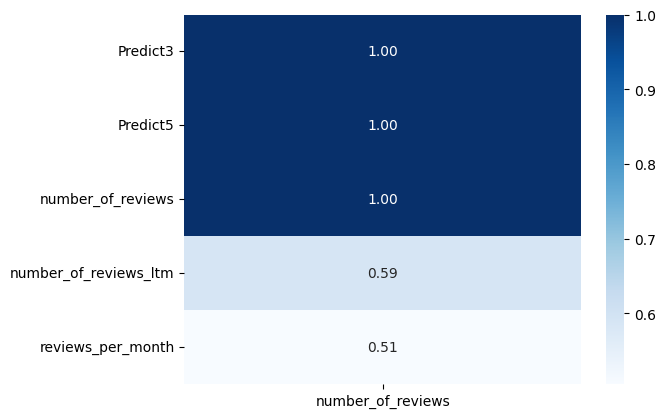

In [51]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [52]:
# Modelo original
df = df[df["room_type_num"] == 0]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,1369632,2011,1,1,1,1,45.390840,-75.756210,1.0,1,...,3,2,3,3,5,0.65,5,5,5,5
1,415201,2011,0,1,1,1,45.168200,-75.712080,1.0,2,...,1,3,3,2,5,0.04,5,5,5,5
3,2058676,2012,1,1,1,1,45.269100,-75.721970,1.0,5,...,3,2,3,4,5,0.57,5,5,5,5
4,3201295,2012,0,6,1,1,45.404550,-75.731300,1.0,2,...,3,2,3,2,5,0.09,5,5,5,5
5,3201295,2012,0,6,1,1,45.400300,-75.731440,1.0,2,...,3,2,3,2,5,0.08,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,27076237,2015,0,8,1,1,45.440390,-75.657106,1.0,2,...,3,3,3,4,5,1.16,5,5,5,5
2854,475319012,2022,1,25,1,1,45.252685,-75.754497,3.5,4,...,3,1,3,4,5,1.00,5,5,5,5
2859,85297148,2016,0,84,1,1,45.093966,-75.595666,3.0,4,...,3,2,3,4,5,1.16,5,5,5,5
2860,21218752,2014,0,1,1,1,45.402610,-75.730990,1.0,2,...,3,2,3,1,5,1.16,5,5,5,5


In [53]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2


,number_of_reviews
number_of_reviews,1.000000
number_of_reviews_ltm,0.588619
reviews_per_month,0.505025
number_of_reviews_l30d,0.418558
minimum_nights_avg_ntm,0.273001
amenities_num,0.246217
host_is_superhost,0.244385
maximum_nights_avg_ntm,0.201257


<Axes: >

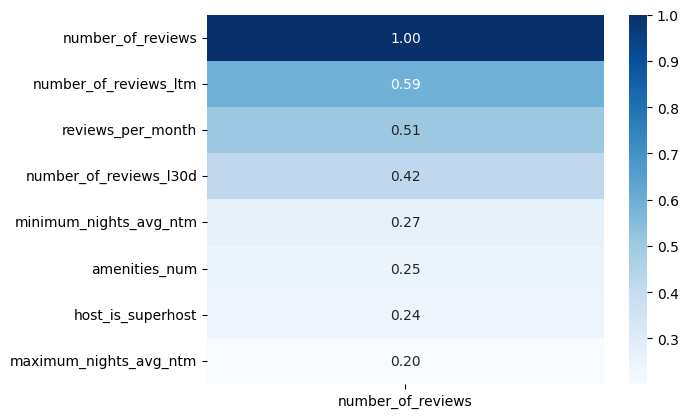

In [54]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

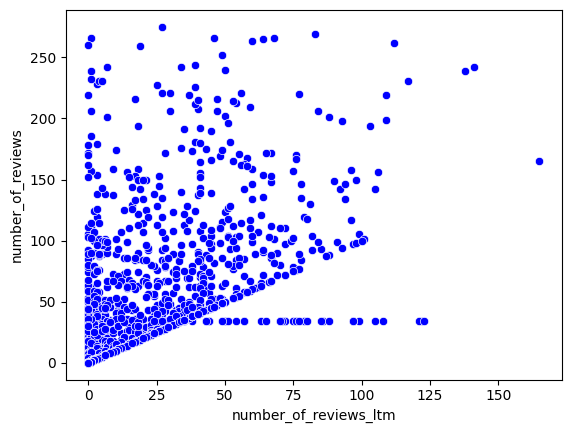

In [55]:
# Para este tipo de habitación "Entire Home / Apt", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome)

In [56]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews_ltm"]]
Var_Dep = dfHome[["number_of_reviews"]]

In [57]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.33660416]]),
 'rank_': 1,
 'singular_': array([980.30848656]),
 'intercept_': array([17.1896246])}

**Modelo Matemático: y = 1.33660416x + 17.1896246**

In [58]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "number_of_reviews_ltm"
y_pred = model.predict(X = dfHome[['number_of_reviews_ltm']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(13, 'PredictFinal', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,number_of_reviews_ltm
0,0,92.915545,94.0,91.400073,100.0,5,4.959784,183.807157,5,175,99,89.238997,99,35.902083,1.954629,0.65,5,14
1,0,87.285878,100.0,91.400073,100.0,5,4.959784,194.376222,5,200,265,89.557916,6,18.526229,1.954629,0.04,5,1
3,0,91.523262,82.0,91.400073,100.0,5,4.959784,186.421011,5,66,344,87.848513,76,50.604729,1.954629,0.57,5,25
4,0,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,91,175,88.167431,9,19.862833,1.954629,0.09,5,2
5,0,87.467480,89.0,91.400073,100.0,5,4.959784,194.035284,5,129,107,88.652187,9,19.862833,1.954629,0.08,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,0,86.922674,100.0,91.400073,100.0,5,4.959784,195.058097,5,241,165,90.080942,0,17.189625,1.954629,1.16,5,0
2854,0,86.983208,96.0,90.016633,97.0,5,4.959784,194.944451,5,259,267,90.310564,1,18.526229,1.954629,1.00,5,1
2859,0,86.922674,98.0,91.400073,100.0,5,4.959784,195.058097,5,513,365,93.550776,0,17.189625,1.954629,1.16,5,0
2860,0,86.922674,87.5,89.002111,94.8,5,4.959784,195.058097,5,80,329,88.027107,0,17.189625,1.954629,1.16,5,0


<Axes: xlabel='number_of_reviews_ltm', ylabel='number_of_reviews'>

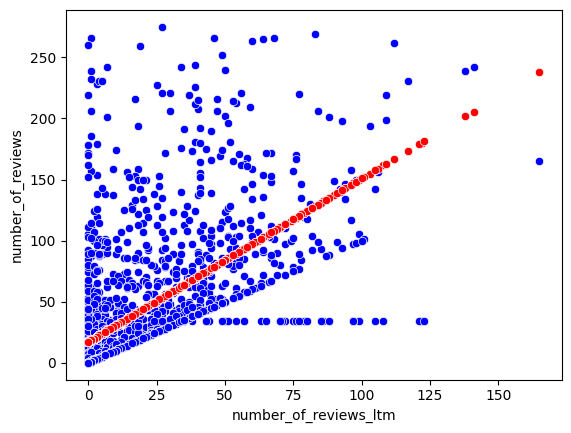

In [59]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'number_of_reviews', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews_ltm', y = 'PredictFinal', color = "red", data = dfHome)

In [60]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.5886194528491291